In [240]:
#Impporting packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [241]:
#loadiing dataset
df= pd.read_csv("Downloads/archive (16)/Crop_recommendation.csv")

In [242]:
#confirming if data really loaded
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Eploratory Data Analysis

In [243]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [244]:
#Descriptive analysis
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [245]:
#Checking for missing values
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [246]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [247]:
#checking for the variation in each column
for i in df.columns:
    if df[i].dtypes != 'O' :
        var= df[i].var()
        print(i,':',var/100)

N : 13.628895373930355
P : 10.880684600438215
K : 25.652128686593006
temperature : 0.2564154988358514
humidity : 4.956773065043814
ph : 0.005989795449530236
rainfall : 30.20424469251454


In [248]:
#boxplot to identify outliers
df.boxplot()

<Axes: >

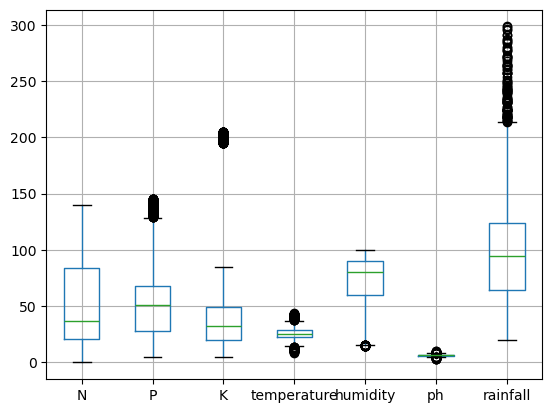

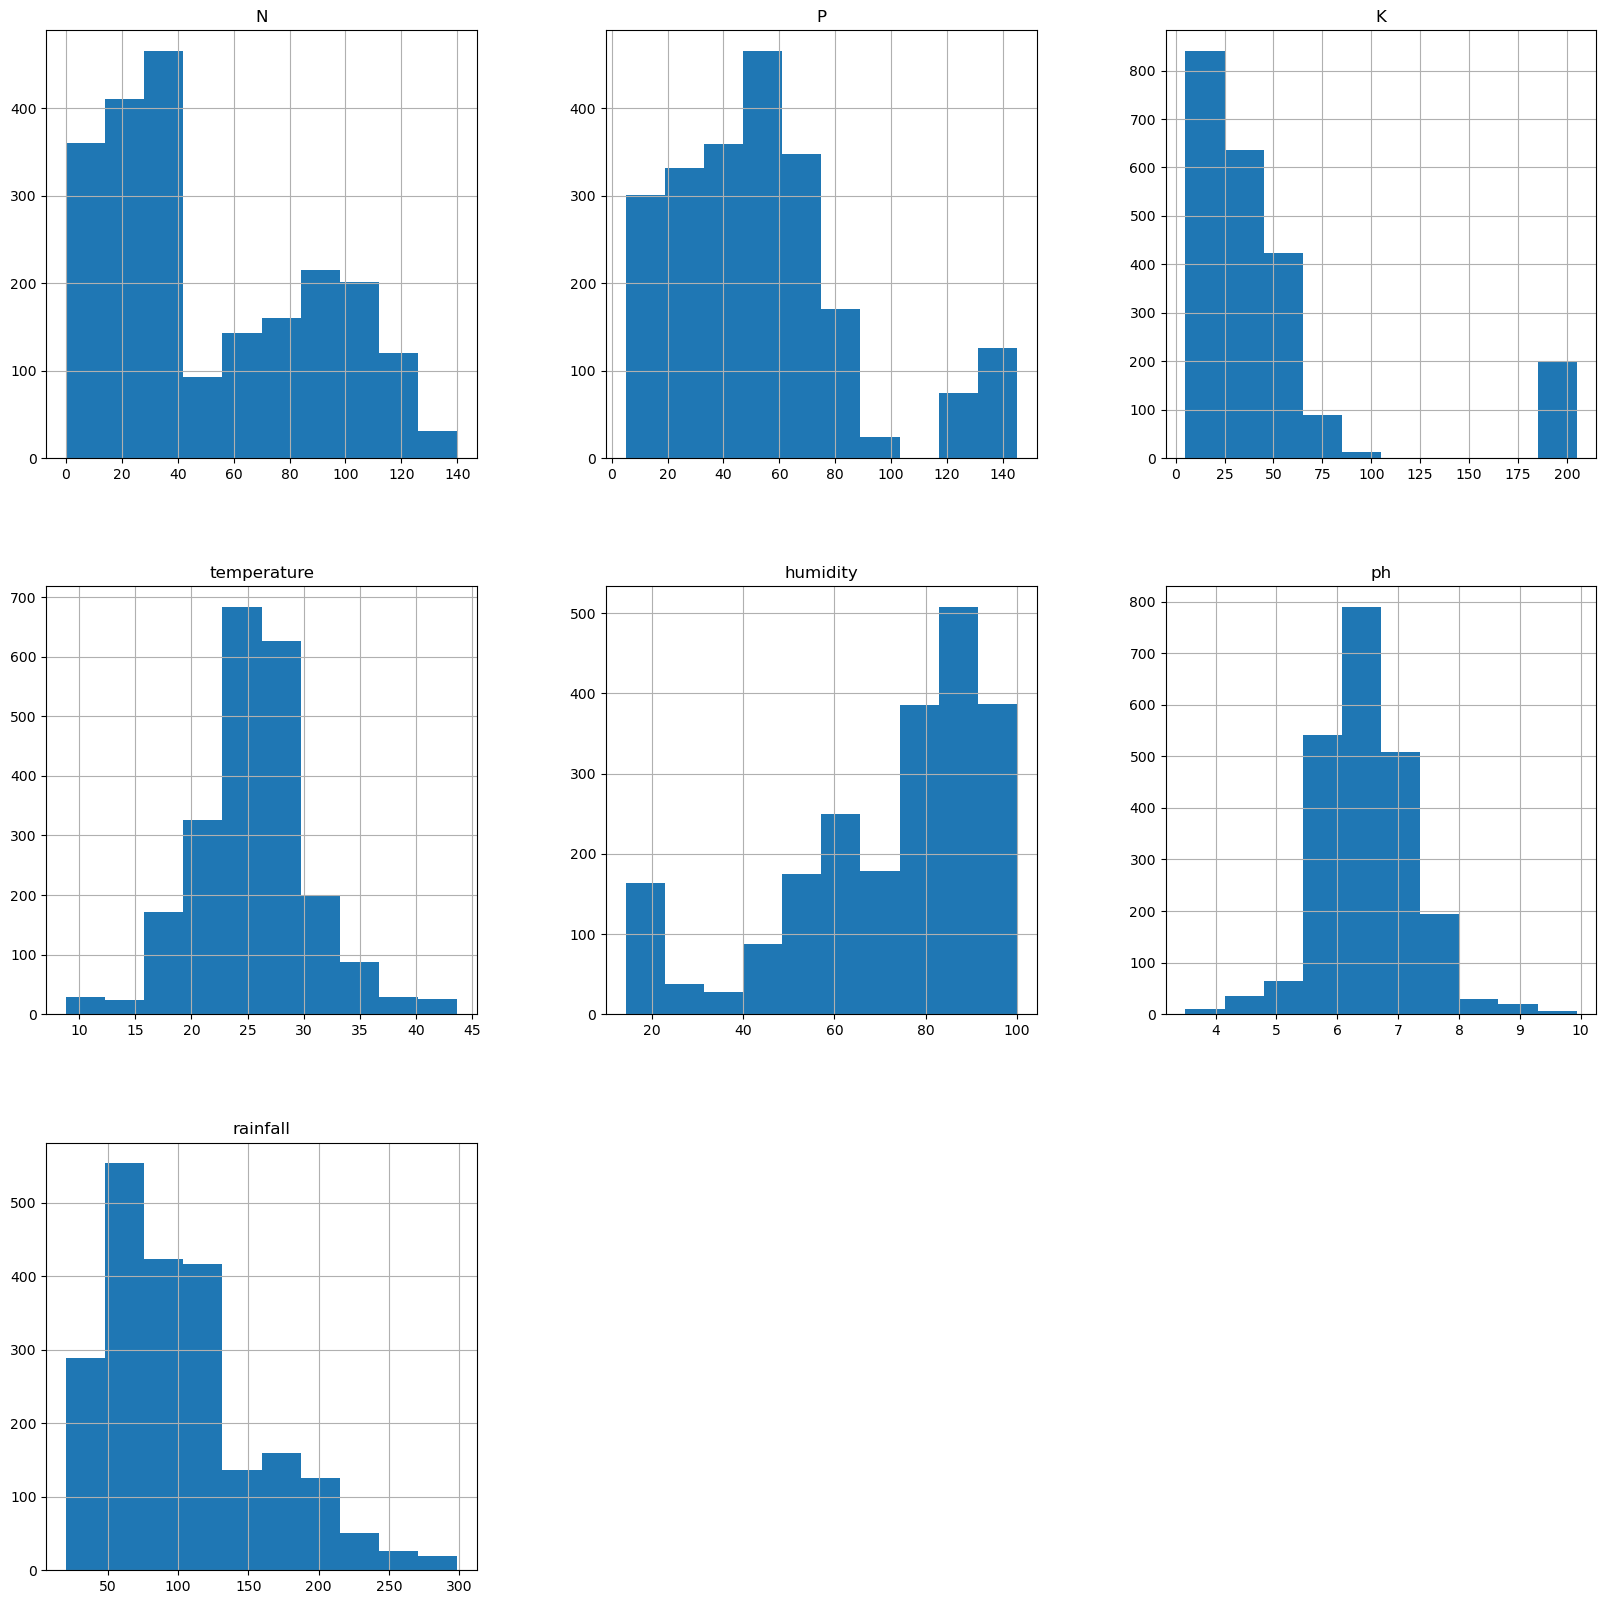

In [249]:
#Histogram to help understand the distribution of data in each columns which would help me choose the type of imputation and so on.
df.hist(figsize=(20,20))
plt.show()

# Data Spliting

In [250]:
X=df.drop(columns='label')

In [251]:
y= df.label

In [252]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [253]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [254]:
# checking for skewness
X.skew()

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

In [255]:
from sklearn.model_selection import train_test_split 

In [256]:
#spliting data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=44)

In [257]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
338,25,63,20,15.786014,21.145441,5.502999,95.170281
1570,15,123,204,22.527093,92.547804,6.365973,115.383007
678,27,56,20,29.211422,87.114978,6.418743,51.538482
1622,8,7,10,28.262049,91.983174,6.929216,105.213226
...,...,...,...,...,...,...,...
84,67,58,39,25.282722,80.543728,5.453592,220.115671
2144,87,23,28,26.223674,62.265946,6.979591,193.746197
571,2,56,23,26.653330,59.790234,7.550091,36.918526
1197,22,18,33,30.412358,52.481006,6.621624,93.923759


In [258]:
# since the nitrogrn content of soil can never be 0 I'm replacing it with NAN(Not a number) for both x_train and x_test separately to prevent data leakage
x_train.N=x_train.N.replace(0,np.nan)

In [259]:
x_test.N=x_test.N.replace(0,np.nan)

In [260]:
x_test.isnull().sum()

N              7
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

# filling in missing values 

In [261]:

x_train['N']= x_train['N'].fillna(x_train['N'].median())

In [262]:
x_test['N']= x_test['N'].fillna(x_test['N'].median())

In [263]:
x_train[['P','K']]=np.log1p(x_train[['P','K']])

In [265]:
x_train.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

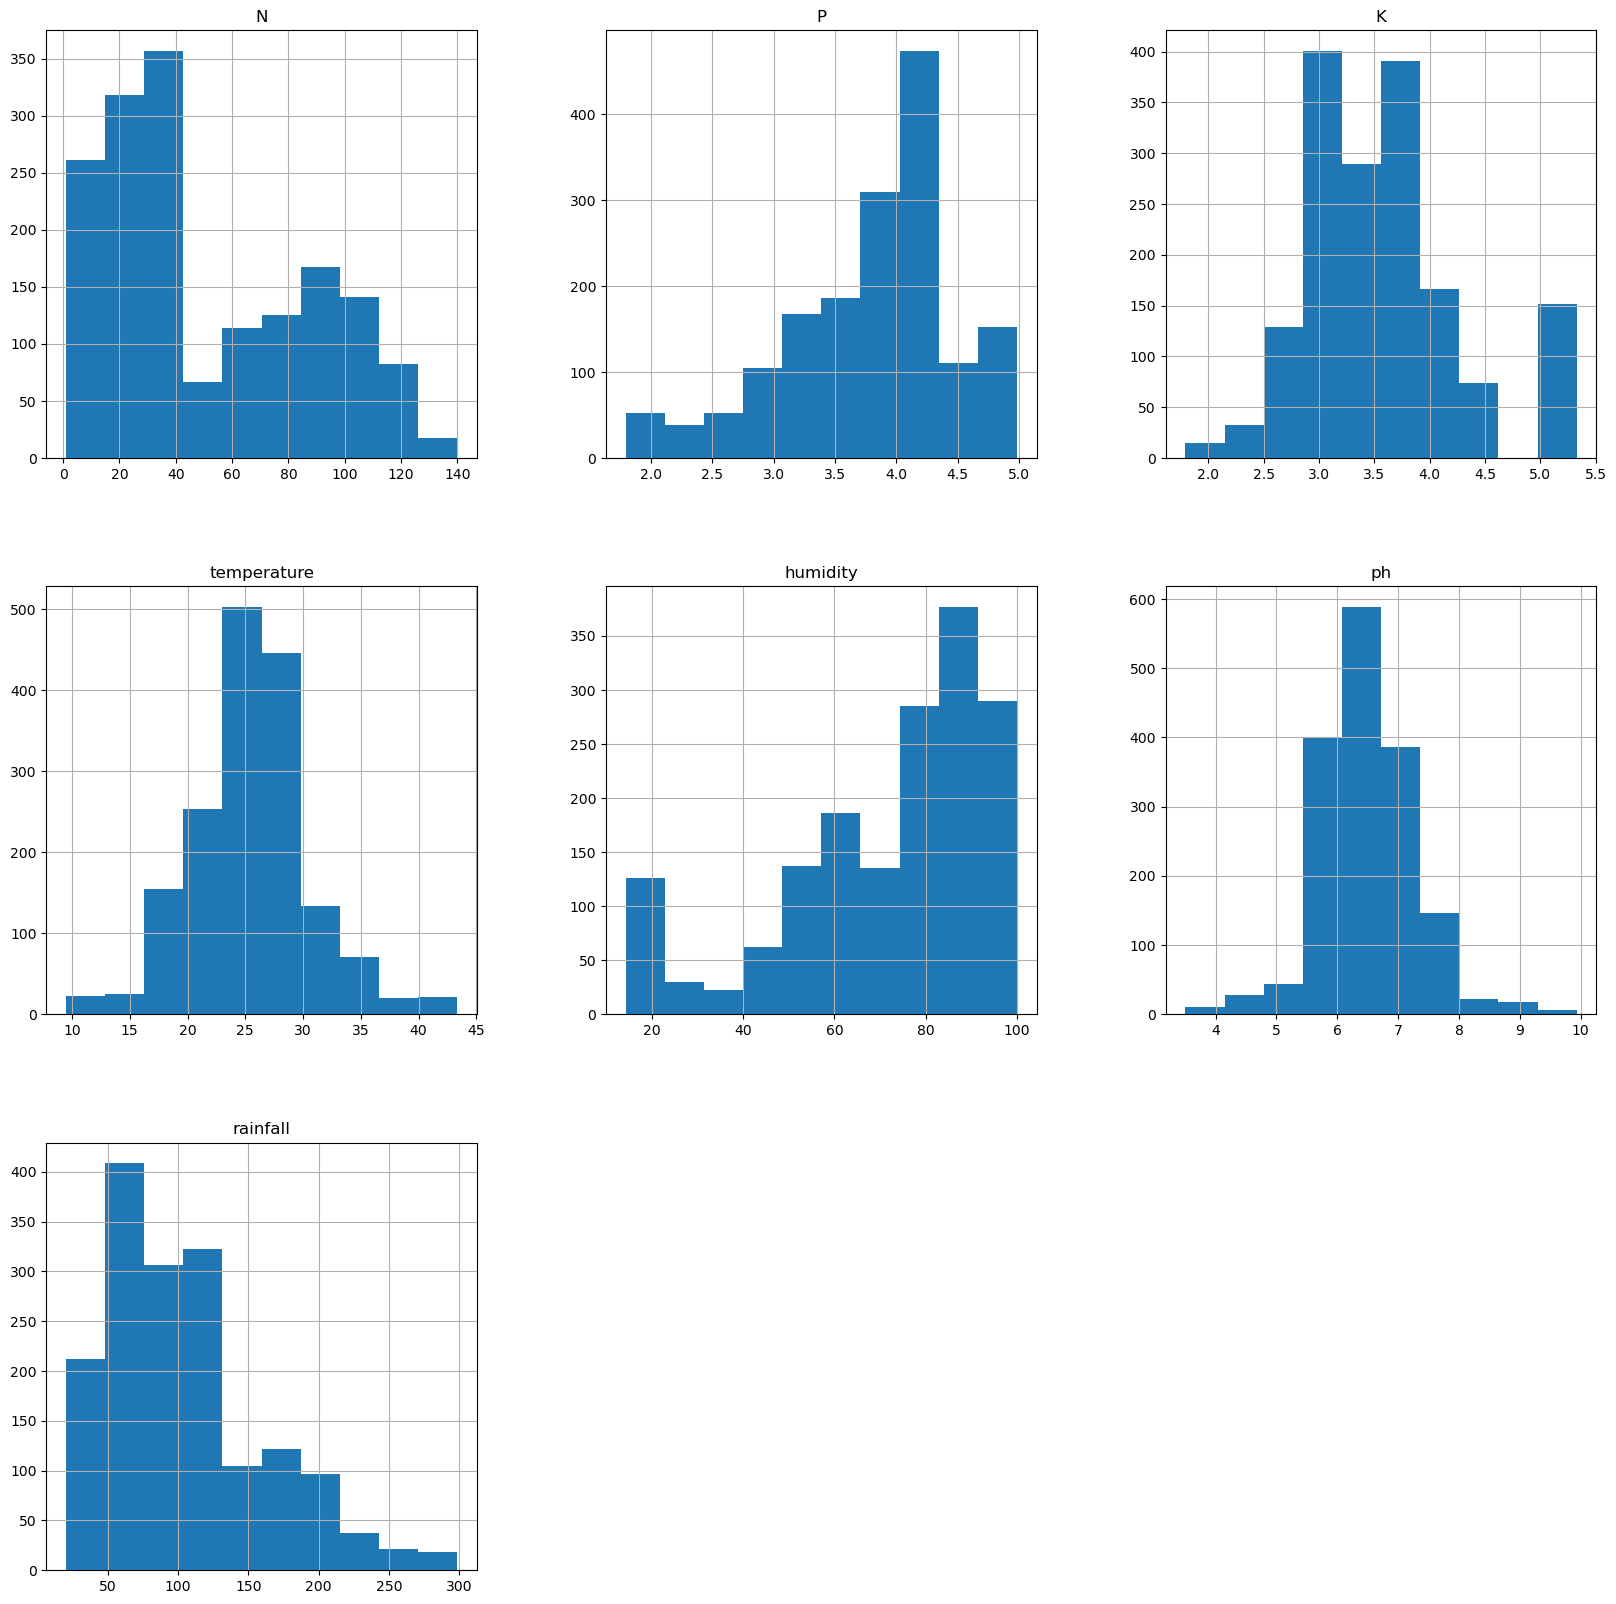

In [266]:
x_train.hist(figsize=(20,20))
plt.show()

## log transform to reduce skewness

In [267]:
x_test[['P','K']]=np.log1p(x_test[['P','K']])

In [268]:

#powetransormer

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [269]:
pt = PowerTransformer()

In [270]:
x_train[['humidity']]=pt.fit_transform(x_train[['humidity']])

In [271]:
x_test[['humidity']]=pt.transform(x_test[['humidity']])

In [272]:
#scaling
from sklearn.preprocessing import StandardScaler

In [273]:
sk= StandardScaler()

In [274]:
scale=['humidity','P','K','ph','rainfall','temperature','N']

In [275]:
x_scaled=sk.fit_transform(x_train[scale])

In [276]:
x_scaled

array([[ 1.03350534, -2.86995744, -2.48053559, ...,  0.15004177,
        -0.85469958, -1.13436377],
       [-1.8629592 ,  0.52669196, -0.74621303, ..., -0.17043578,
        -1.91799443, -0.71814675],
       [ 1.11789264,  1.47575045,  2.40812059, ...,  0.1932126 ,
        -0.59724978, -0.99562476],
       ...,
       [-0.75994753,  0.36048177, -0.56135244, ..., -1.21844665,
         0.21118239, -1.35634619],
       [-1.05801511, -1.21594658, -0.07915734, ..., -0.19286204,
         0.94766914, -0.80139015],
       [ 1.403041  , -2.28814464, -0.12048573, ...,  0.71405605,
         0.28037403, -0.66265114]])

In [277]:
x_test_scaled=sk.transform(x_test[scale])

In [278]:
from sklearn.preprocessing import LabelEncoder 

In [279]:
el= LabelEncoder()

In [280]:
y_train= el.fit_transform(y_train)

In [281]:
pd.DataFrame(y_train)

,0
0,16
1,9
2,0
3,14
4,16
...,...
1645,20
1646,5
1647,13
1648,12


In [282]:
for i ,labels in enumerate(el.classes_):
    print(labels,':',i)

apple : 0
banana : 1
blackgram : 2
chickpea : 3
coconut : 4
coffee : 5
cotton : 6
grapes : 7
jute : 8
kidneybeans : 9
lentil : 10
maize : 11
mango : 12
mothbeans : 13
mungbean : 14
muskmelon : 15
orange : 16
papaya : 17
pigeonpeas : 18
pomegranate : 19
rice : 20
watermelon : 21


In [283]:
y_test= el.transform(y_test)

In [284]:
# Model building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import *

In [285]:
sv=SVC()

In [286]:
sv.fit(x_scaled,y_train)

SVC()

In [287]:
y_pred=sv.predict(x_test_scaled)

In [288]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        28
           2       0.93      1.00      0.96        27
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        25
           8       0.68      1.00      0.81        19
           9       0.95      1.00      0.97        19
          10       1.00      0.96      0.98        27
          11       1.00      1.00      1.00        25
          12       0.97      1.00      0.98        28
          13       1.00      0.95      0.98        22
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        29
          16       1.00      1.00      1.00        24
          17       1.00    

In [289]:
import pickle
pickle.dump(sv,open('crop_type1.pkle','wb'))


In [290]:
kn= KNeighborsClassifier()

In [291]:
kn.fit(x_scaled,y_train)

KNeighborsClassifier()

In [292]:
y_pred_k=kn.predict(x_test_scaled)

In [293]:
print(classification_report(y_test,y_pred_k))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        28
           2       0.96      1.00      0.98        27
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        19
           6       0.94      1.00      0.97        32
           7       1.00      1.00      1.00        25
           8       0.76      1.00      0.86        19
           9       0.95      1.00      0.97        19
          10       1.00      0.96      0.98        27
          11       1.00      0.92      0.96        25
          12       0.93      1.00      0.97        28
          13       1.00      0.91      0.95        22
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        29
          16       1.00      1.00      1.00        24
          17       1.00    

In [294]:
import pickle
pickle.dump(kn,open('crop_type_k1.pkle','wb'))